<a href="https://colab.research.google.com/github/KUNALKEDARI20/Data-science/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:

filename='/content/pima-indians-diabetes.data.csv'
cols=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=pd.read_csv(filename,names=cols)
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)#test size=30%

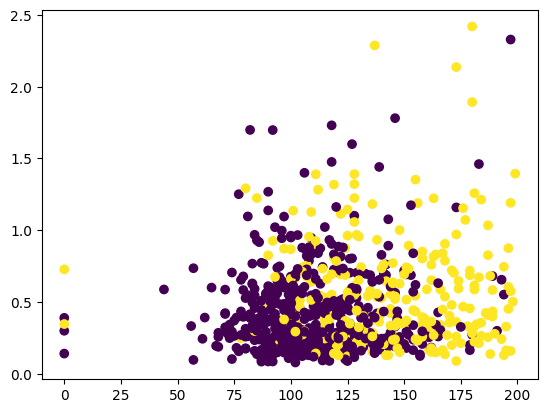

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class'])
plt.show()

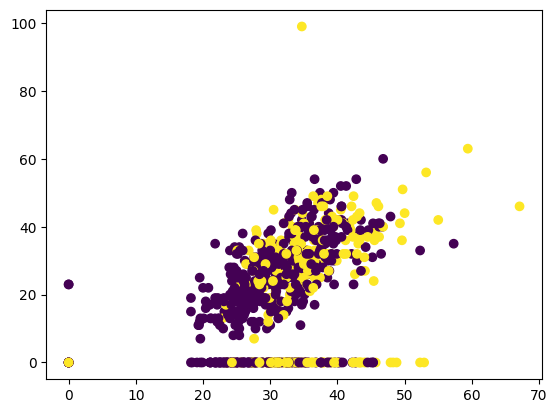

In [ ]:

plt.scatter(dataframe['mass'],dataframe['skin'],c=dataframe['class'])
plt.show()

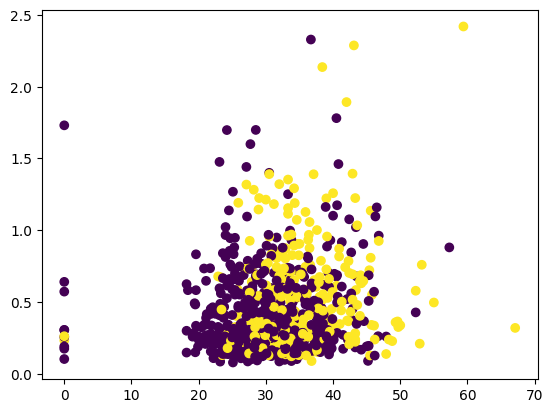

In [ ]:

plt.scatter(dataframe['mass'],dataframe['pedi'],c=dataframe['class'])
plt.show()

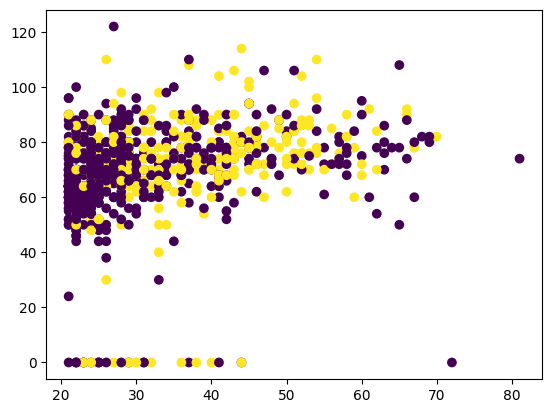

In [ ]:

plt.scatter(dataframe['age'],dataframe['pres'],c=dataframe['class'])
plt.show()

In [ ]:
clf=SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100
print('ACCURACY==',acc)
#Confusion matrix
confusion_matrix(y_test,y_pred)

ACCURACY== 74.89177489177489


array([[131,  16],
       [ 42,  42]])

▶**GRID SEARCH CV**

In [ ]:
num_folds=10
kfold=KFold(n_splits=num_folds)

In [ ]:
#to get optimal value of Gamma we use GridSearchCV method
svm_classifier=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1]}] # C is regularization parameter . it's not mandatory to always give C values
gsv=GridSearchCV(estimator=svm_classifier,param_grid=param_grid,cv=kfold)
gsv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_,gsv.best_score_ #76% accuracy

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7599231306778477)

In [ ]:
# Building a Model of svc with 0.0001 gamma value
clf=SVC(C=1,kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100
print('ACCURACY==',acc)
#Confusion matrix
confusion_matrix(y_test,y_pred)

ACCURACY== 74.89177489177489


array([[131,  16],
       [ 42,  42]])

In [ ]:
(131+42)/(131+42+42+16)*100

74.89177489177489